# **Data Scrapping**

 **Importing Important Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime

**Reading CSV**

In [3]:
cities = pd.read_csv("pakistan_cities.csv")
cities.head()

,City,Province,Country
0,Karachi,Sindh,Pakistan
1,Hyderabad,Sindh,Pakistan
2,Sukkur,Sindh,Pakistan
3,Larkana,Sindh,Pakistan
4,Mirpurkhas,Sindh,Pakistan


**Fetching Data Using API**

In [27]:
import requests
import pandas as pd
from datetime import datetime

api = 'f9296b23182afbeb0d1b9b80fed64467'
Weather_data = []

for index, row in cities.iterrows():
    city = row['City']
    country = row['Country']
    province = row['Province']
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city},{country}&appid={api}'
    response = requests.get(url)

    if response.status_code == 200:
      data = response.json()

      temp = data['main']['temp']
      feels_like = data['main']['feels_like']
      temp_min = data['main']['temp_min']
      temp_max = data['main']['temp_max']
      humidity = data['main']['humidity']
      pressure = data['main']['pressure']
      wind_speed = data['wind']['speed']
      desc = data['weather'][0]['description']

      clouds = data['clouds']['all']
      lon = data['coord']['lon']
      lat = data['coord']['lat']
      sunrise_unix = data['sys']['sunrise']
      sunset_unix = data['sys']['sunset']

      sunrise = datetime.fromtimestamp(sunrise_unix).strftime('%I:%M %p')
      sunset = datetime.fromtimestamp(sunset_unix).strftime('%I:%M %p')

      Weather_data.append({
          'Country' : country,
          'Province' : province,
          'City' : city,
          'Temprature' : temp,
          'Feels_Like' : feels_like,
          'Temp_Min' : temp_min,
          'Temp_Max' : temp_max,
          'Humidity' : humidity,
          'Pressure' : pressure,
          'Wind_Speed' : wind_speed,
          'Description' : desc,
          'Clouds' : clouds,
          'Lon' : lon,
          'Lat' : lat,
          'Sunrise': sunrise,
          'Sunset': sunset,
      })

    else:
      Weather_data.append({
          'City': city,
          'Error' : f'Error fetchind data : {response.status_code}'
      })
Weather = pd.DataFrame(Weather_data)





**Saving CSV**

In [30]:
print(Weather)
Weather.to_csv('pakistan weather data.csv', index = False)
Weather.head()

      Country     Province        City  Temprature  Feels_Like  Temp_Min  \
0    Pakistan        Sindh     Karachi      303.05      306.19    303.05   
1    Pakistan        Sindh   Hyderabad      302.88      306.46    302.88   
2    Pakistan        Sindh      Sukkur      311.41      311.75    311.41   
3    Pakistan        Sindh     Larkana      312.64      313.39    312.64   
4         NaN          NaN  Mirpurkhas         NaN         NaN       NaN   
..        ...          ...         ...         ...         ...       ...   
142  Pakistan  Balochistan   Nasirabad      304.57      305.86    304.57   
143       NaN          NaN        Tump         NaN         NaN       NaN   
144  Pakistan  Balochistan       Kahan      300.61      299.46    300.61   
145  Pakistan  Balochistan  Shahdadkot      312.81      312.35    312.81   
146  Pakistan  Balochistan      Ormara      300.06      302.52    300.06   

     Temp_Max  Humidity  Pressure  Wind_Speed       Description  Clouds  \
0      303.0

,Country,Province,City,Temprature,Feels_Like,Temp_Min,Temp_Max,Humidity,Pressure,Wind_Speed,Description,Clouds,Lon,Lat,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,303.05,306.19,303.05,303.05,62.0,1003.0,7.72,broken clouds,75.0,67.0822,24.9056,01:17 AM,01:36 PM,NaN
1,Pakistan,Sindh,Hyderabad,302.88,306.46,302.88,302.88,65.0,1004.0,6.69,scattered clouds,40.0,78.4744,17.3753,12:34 AM,12:48 PM,NaN
2,Pakistan,Sindh,Sukkur,311.41,311.75,311.41,311.41,26.0,1000.0,3.23,clear sky,0.0,68.8574,27.7052,01:09 AM,01:29 PM,NaN
3,Pakistan,Sindh,Larkana,312.64,313.39,312.64,312.64,25.0,1000.0,3.00,clear sky,0.0,68.2141,27.5551,01:12 AM,01:32 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetchind data : 404


# **Data Exploration**

**Loading Data**

In [56]:
df = pd.read_csv('pakistan weather data.csv')
df.head()

,Country,Province,City,Temprature,Feels_Like,Temp_Min,Temp_Max,Humidity,Pressure,Wind_Speed,Description,Clouds,Lon,Lat,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,303.05,306.19,303.05,303.05,62.0,1003.0,7.72,broken clouds,75.0,67.0822,24.9056,01:17 AM,01:36 PM,NaN
1,Pakistan,Sindh,Hyderabad,302.88,306.46,302.88,302.88,65.0,1004.0,6.69,scattered clouds,40.0,78.4744,17.3753,12:34 AM,12:48 PM,NaN
2,Pakistan,Sindh,Sukkur,311.41,311.75,311.41,311.41,26.0,1000.0,3.23,clear sky,0.0,68.8574,27.7052,01:09 AM,01:29 PM,NaN
3,Pakistan,Sindh,Larkana,312.64,313.39,312.64,312.64,25.0,1000.0,3.00,clear sky,0.0,68.2141,27.5551,01:12 AM,01:32 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetchind data : 404


**Checking Data Structure**

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      121 non-null    object 
 1   Province     121 non-null    object 
 2   City         147 non-null    object 
 3   Temprature   121 non-null    float64
 4   Feels_Like   121 non-null    float64
 5   Temp_Min     121 non-null    float64
 6   Temp_Max     121 non-null    float64
 7   Humidity     121 non-null    float64
 8   Pressure     121 non-null    float64
 9   Wind_Speed   121 non-null    float64
 10  Description  121 non-null    object 
 11  Clouds       121 non-null    float64
 12  Lon          121 non-null    float64
 13  Lat          121 non-null    float64
 14  Sunrise      121 non-null    object 
 15  Sunset       121 non-null    object 
 16  Error        26 non-null     object 
dtypes: float64(10), object(7)
memory usage: 19.6+ KB


**Getting Summary**

In [47]:
df.describe()


,Temprature,Feels_Like,Temp_Min,Temp_Max,Humidity,Pressure,Wind_Speed,Clouds,Lon,Lat
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,307.157851,307.514463,307.154132,307.173223,32.041322,1002.380165,3.208017,7.314050,68.753469,29.888118
std,5.438509,5.861581,5.454422,5.395935,15.480308,3.819372,2.139962,21.557301,12.616513,5.117664
min,283.310000,281.160000,283.310000,283.310000,9.000000,1000.000000,0.000000,0.000000,-9.569000,8.518500
25%,304.180000,304.600000,304.180000,304.180000,23.000000,1000.000000,1.860000,0.000000,68.223100,27.529500
50%,308.990000,310.290000,308.990000,308.990000,27.000000,1001.000000,2.680000,0.000000,70.634800,30.300000
75%,311.200000,311.530000,311.200000,311.200000,37.000000,1003.000000,3.840000,1.000000,72.934100,32.161700
max,312.840000,313.640000,312.840000,312.840000,100.000000,1024.000000,8.740000,100.000000,117.789200,51.445000


**Checking Unique Values**

In [48]:
df['City'].unique()

array(['Karachi', 'Hyderabad', 'Sukkur', 'Larkana', 'Mirpurkhas',
       'Nawabshah', 'Jacobabad', 'Dadu', 'Thatta', 'Badin', 'Shikarpur',
       'Khairpur', 'Tando Adam', 'Tando Allahyar', 'Sanghar', 'Umerkot',
       'Jamshoro', 'Matiari', 'Ghotki', 'Qambar', 'Shahdadkot',
       'Tharparkar', 'Hala', 'Naushahro Feroze', 'Samaro', 'Chachro',
       'Pano Aqil', 'Pithoro', 'Pir Jo Goth', 'Kotri', 'Mirpur Bathoro',
       'Daro', 'Daur', 'Kandiaro', 'Shahpur Chakar', 'Lakha', 'Sann',
       'Khipro', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Multan',
       'Gujranwala', 'Sialkot', 'Bahawalpur', 'Rahim Yar Khan',
       'Sargodha', 'Sheikhupura', 'Jhang', 'Kasur', 'Okara', 'Sahiwal',
       'Dera Ghazi Khan', 'Toba Tek Singh', 'Chiniot', 'Narowal',
       'Jehlum', 'Mianwali', 'Khushab', 'Layyah', 'Bhakkar', 'Hafizabad',
       'Muridke', 'Jaranwala', 'Pattoki', 'Arifwala', 'Burewala',
       'Pakpattan', 'Kahror Pakka', 'Kot Addu', 'Depalpur', 'Samundri',
       'Jalalpur Bhattian', 'Kha

In [49]:
df['Description'].value_counts()

,count
Description,
clear sky,103
few clouds,5
overcast clouds,4
haze,3
broken clouds,2
scattered clouds,2
heavy intensity rain,1
smoke,1


# **Data Cleaning**

**Loading Dataset**

In [60]:
df = pd.read_csv('pakistan weather data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      121 non-null    object 
 1   Province     121 non-null    object 
 2   City         147 non-null    object 
 3   Temprature   121 non-null    float64
 4   Feels_Like   121 non-null    float64
 5   Temp_Min     121 non-null    float64
 6   Temp_Max     121 non-null    float64
 7   Humidity     121 non-null    float64
 8   Pressure     121 non-null    float64
 9   Wind_Speed   121 non-null    float64
 10  Description  121 non-null    object 
 11  Clouds       121 non-null    float64
 12  Lon          121 non-null    float64
 13  Lat          121 non-null    float64
 14  Sunrise      121 non-null    object 
 15  Sunset       121 non-null    object 
 16  Error        26 non-null     object 
dtypes: float64(10), object(7)
memory usage: 19.6+ KB


**Dropping Error and Unnecessary columns**

In [61]:
df.drop(columns=['Error'], inplace=True)


**Droping Nulls**

In [65]:
print(df.isnull().sum())
df.dropna(inplace= True)

Country        26
Province       26
City            0
Temprature     26
Feels_Like     26
Temp_Min       26
Temp_Max       26
Humidity       26
Pressure       26
Wind_Speed     26
Description    26
Clouds         26
Lon            26
Lat            26
Sunrise        26
Sunset         26
dtype: int64


**Verifying If Nulls removed**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 0 to 146
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      121 non-null    object 
 1   Province     121 non-null    object 
 2   City         121 non-null    object 
 3   Temprature   121 non-null    float64
 4   Feels_Like   121 non-null    float64
 5   Temp_Min     121 non-null    float64
 6   Temp_Max     121 non-null    float64
 7   Humidity     121 non-null    float64
 8   Pressure     121 non-null    float64
 9   Wind_Speed   121 non-null    float64
 10  Description  121 non-null    object 
 11  Clouds       121 non-null    float64
 12  Lon          121 non-null    float64
 13  Lat          121 non-null    float64
 14  Sunrise      121 non-null    object 
 15  Sunset       121 non-null    object 
dtypes: float64(10), object(6)
memory usage: 20.1+ KB


**Normalizing Columns**

In [69]:
df.columns = df.columns.str.lower()
df.head()

,country,province,city,temprature,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,description,clouds,lon,lat,sunrise,sunset
0,Pakistan,Sindh,Karachi,303.05,306.19,303.05,303.05,62.0,1003.0,7.72,broken clouds,75.0,67.0822,24.9056,01:17 AM,01:36 PM
1,Pakistan,Sindh,Hyderabad,302.88,306.46,302.88,302.88,65.0,1004.0,6.69,scattered clouds,40.0,78.4744,17.3753,12:34 AM,12:48 PM
2,Pakistan,Sindh,Sukkur,311.41,311.75,311.41,311.41,26.0,1000.0,3.23,clear sky,0.0,68.8574,27.7052,01:09 AM,01:29 PM
3,Pakistan,Sindh,Larkana,312.64,313.39,312.64,312.64,25.0,1000.0,3.00,clear sky,0.0,68.2141,27.5551,01:12 AM,01:32 PM
5,Pakistan,Sindh,Nawabshah,310.79,311.97,310.79,310.79,30.0,1000.0,1.00,clear sky,0.0,68.4096,26.2483,01:12 AM,01:31 PM


**Removing Dublicates**

In [ ]:
df.drop_dublicate(inplace = True)
df.info()

# **EDA + Data Visualization**

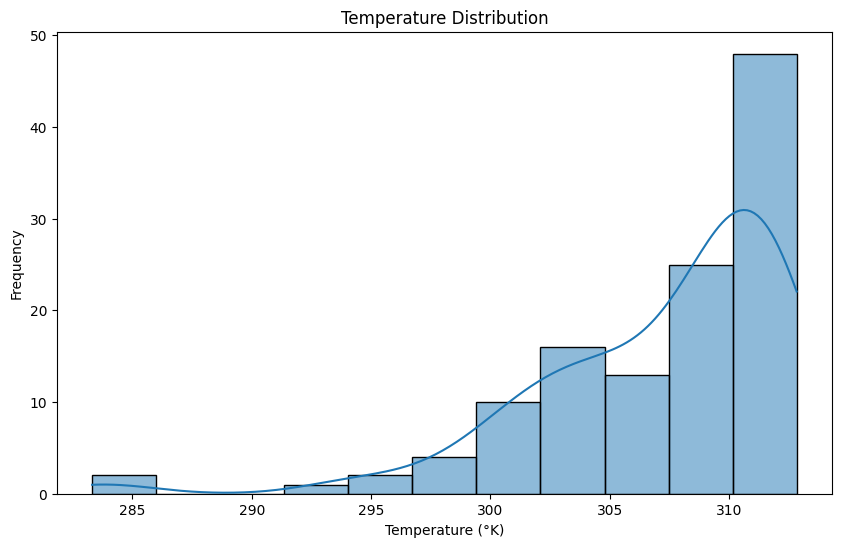

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df['temprature'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°K)')
plt.ylabel('Frequency')
plt.show()

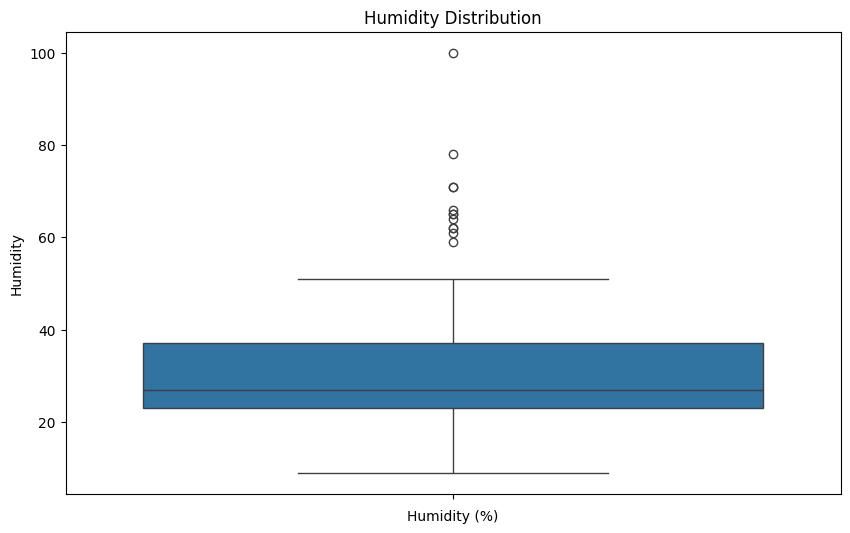

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['humidity'])
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Humidity')
plt.show()


In [81]:
city_province_group = df.groupby(['province', 'city']).agg({
    'temprature' : 'mean',
    'humidity' : 'mean',
    'wind_speed': 'mean'
}).reset_index()
print(city_province_group)

        province            city  temprature  humidity  wind_speed
0    Balochistan          Awaran      309.48      25.0        4.79
1    Balochistan         Barkhan      303.39      22.0        2.33
2    Balochistan            Bela      303.52      66.0        3.57
3    Balochistan          Chaman      304.18      10.0        5.11
4    Balochistan       Dalbandin      310.06       9.0        3.14
..           ...             ...         ...       ...         ...
116        Sindh          Sukkur      311.41      26.0        3.23
117        Sindh      Tando Adam      309.45      36.0        7.32
118        Sindh  Tando Allahyar      308.70      39.0        7.82
119        Sindh          Thatta      305.68      49.0        8.74
120        Sindh         Umerkot      301.14      59.0        6.56

[121 rows x 5 columns]


In [84]:
top_cities = city_province_group.sort_values( by= 'temprature', ascending = False).head(20)
print(top_cities)

        province               city  temprature  humidity  wind_speed
109        Sindh             Qambar      312.84      23.0        1.00
113        Sindh         Shahdadkot      312.81      21.0        0.75
25   Balochistan         Shahdadkot      312.81      21.0        0.75
95         Sindh          Jacobabad      312.78      24.0        2.84
103        Sindh            Larkana      312.64      25.0        3.00
60        Punjab         Faisalabad      312.61      18.0        2.59
83        Punjab           Sargodha      312.50      18.0        2.71
89         Sindh               Dadu      312.44      24.0        0.96
57        Punjab            Chiniot      312.28      18.0        2.68
72        Punjab             Layyah      312.23      20.0        1.54
64        Punjab          Jaranwala      312.21      21.0        2.13
26   Balochistan               Sibi      312.21      20.0        3.51
55        Punjab            Bhakkar      312.20      22.0        1.29
6    Balochistan  De

**Top Hottest Cities in Kalvin**

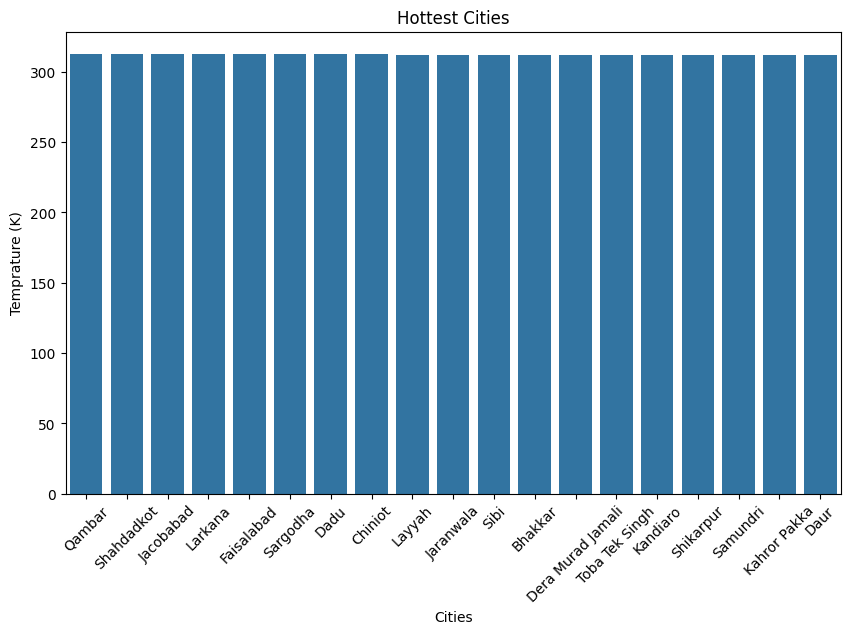

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x='city', y ='temprature', data = top_cities)
plt.title('Hottest Cities')
plt.xticks(rotation=45)
plt.xlabel('Cities')
plt.ylabel('Temprature (K)')
plt.show()

**Scatterplot For Humidity vs Cities**




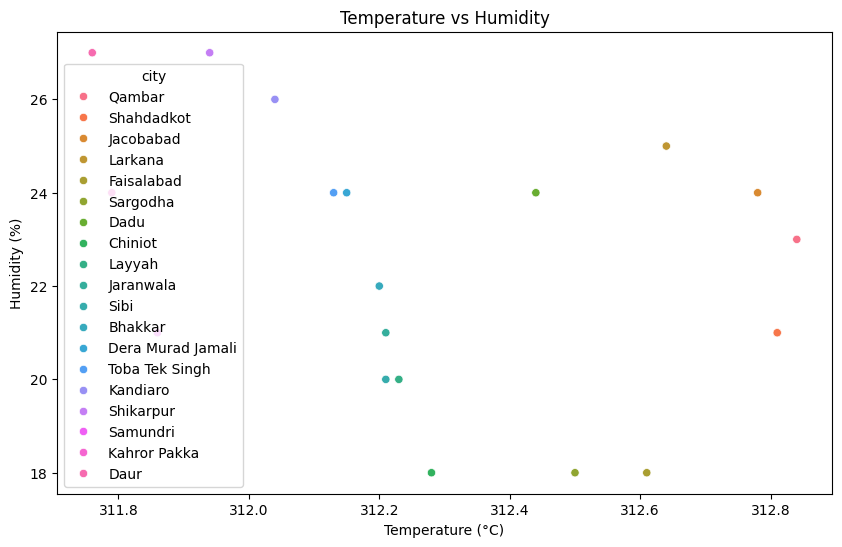

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temprature', y='humidity', data=top_cities, hue='city')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°K)')
plt.ylabel('Humidity (%)')
plt.show()

**Weather Description With Respect to Cities**

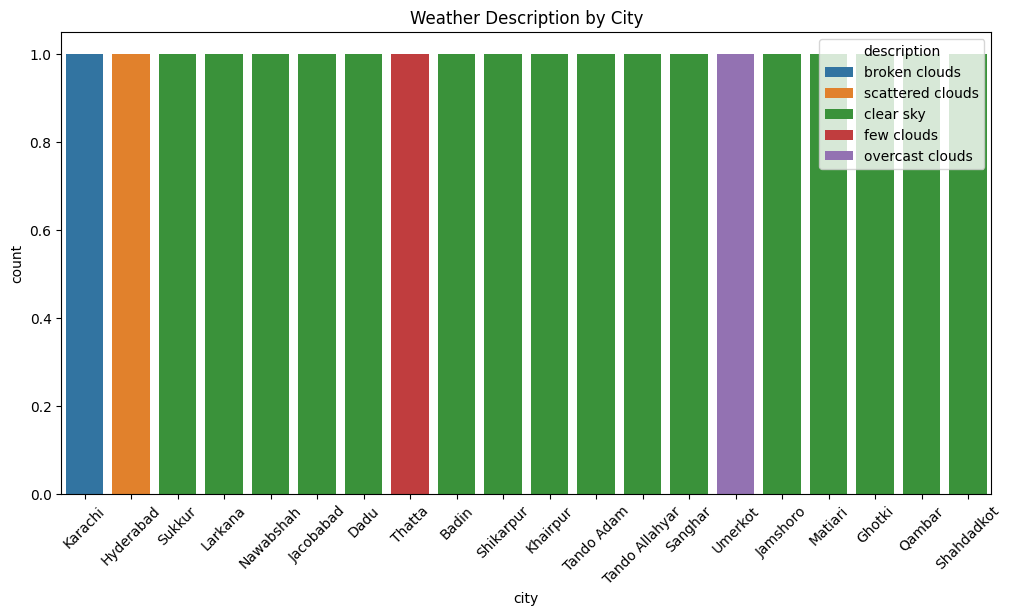

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='description', data=df.head(20))
plt.title('Weather Description by City')
plt.xticks(rotation=45)
plt.show()